In [3]:
import pandas as pd
# Load data from the Excel sheet
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtlus/0 - A_Database and methodology_PhD/PlasticFADE.xlsx"
sheet_name = "RC+CI"

# Read and display the data
data_D = pd.read_excel(file_path, sheet_name=sheet_name, usecols='F:J', skiprows=2)
data_D_1 = data_D.iloc[0:21, :]
pd.set_option('display.float_format', '{:.2e}'.format)
print(data_D_1)

   Polymer.1 Compartment.1  kdegr [d-1]  kdegr_LL[d-1]  kdegr_UL[d-1]
0         PP           Air     5.12e-04       2.02e-04       3.66e-03
1         PP          TopS     7.69e-04       1.48e-04       6.61e-03
2         PP          SubS     3.55e-04       7.21e-05       2.46e-03
3         PP         Beach     7.37e-04       3.23e-04       5.15e-03
4         PP          WSur     5.35e-04       2.29e-04       3.84e-03
5         PP          WCol     1.02e-05       4.23e-06       3.16e-05
6         PP          Sedm     3.10e-05       1.01e-05       1.18e-04
7         PS           Air     8.53e-05       3.95e-05       2.64e-04
8         PS          TopS     9.14e-04       1.43e-04       9.43e-03
9         PS          SubS     4.06e-04       7.32e-05       3.28e-03
10        PS         Beach     2.47e-04       1.10e-04       1.02e-03
11        PS          WSur     1.07e-04       5.72e-05       3.06e-04
12        PS          WCol     9.03e-06       3.49e-06       3.06e-05
13        PS        

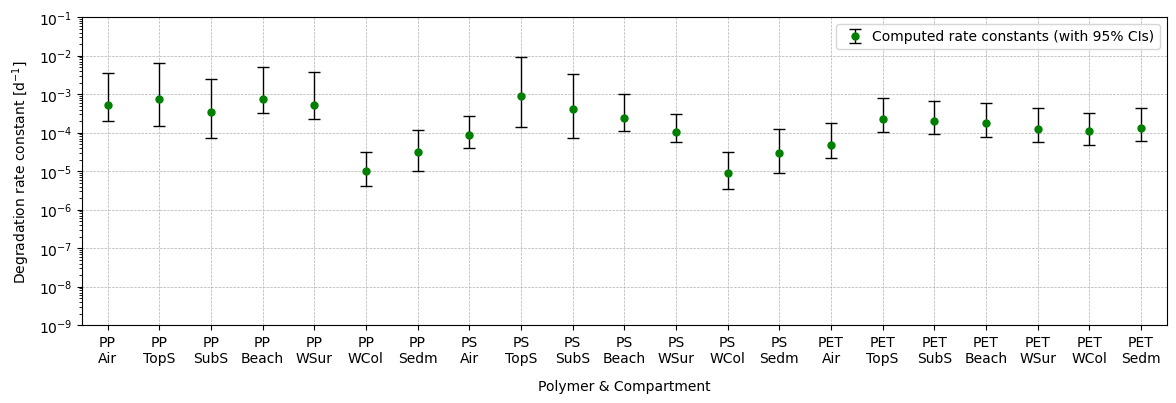

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(14, 4))

data_D_1 = data_D_1.copy()
x = range(len(data_D_1))
data_D_1['x_labels'] = data_D_1['Polymer.1'] + '\n' + data_D_1['Compartment.1']

y = data_D_1['kdegr [d-1]']
yerr_lower = y - data_D_1['kdegr_LL[d-1]']
yerr_upper = data_D_1['kdegr_UL[d-1]'] - y
yerr = [yerr_lower, yerr_upper]  # Asymmetric error bars

# Plot main results with asymmetric error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', color='green', ecolor='black', markersize=5,
             elinewidth=1, capsize=4, label='Computed rate constants (with 95% CIs)')

# Show the outliers (outside the plot boundary)
y_max = 1e-1
label_y = y_max * 10**0.25  # X% above the plot top

for i in range(len(data_D_1)):
    upper = data_D_1['kdegr_UL[d-1]'].iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}".replace("+", "")

        plt.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False  
        )       

    # Draw text label
        plt.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            # fontsize=9,
            color='grey'
        )

# Configure x-axis
plt.xticks(x, data_D_1['x_labels'])
plt.yscale('log')
plt.xlabel('Polymer & Compartment', labelpad=10)
plt.ylabel('Degradation rate constant [d$^{-1}$]', labelpad=5)
plt.legend(loc='upper right', handletextpad=0.2)
plt.xlim(-0.5, len(data_D_1) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-9, 1e-1)  # Set the y-axis range (change manually)
plt.grid(True, which="major", ls="--", lw=0.5)

plt.savefig("/Users/elchulito/DEGR_top.png", dpi=600, bbox_inches='tight')
plt.show()

In [5]:
data_D_2 = data_D.iloc[21:42, :]
print(data_D_2)

   Polymer.1 Compartment.1  kdegr [d-1]  kdegr_LL[d-1]  kdegr_UL[d-1]
21      HDPE           Air     4.73e-05       2.92e-05       2.74e-04
22      HDPE          TopS     3.26e-04       1.02e-04       1.76e-03
23      HDPE          SubS     2.20e-04       7.19e-05       1.02e-03
24      HDPE         Beach     1.83e-04       9.36e-05       7.01e-04
25      HDPE          WSur     1.03e-04       6.38e-05       3.71e-04
26      HDPE          WCol     3.99e-05       2.15e-05       9.78e-05
27      HDPE          Sedm     6.81e-05       3.10e-05       1.95e-04
28      LDPE           Air     1.16e-04       1.14e-04       1.18e-04
29      LDPE          TopS     9.52e-04       2.17e-04       1.82e-02
30      LDPE          SubS     4.82e-04       7.13e-05       7.44e-03
31      LDPE         Beach     3.46e-04       1.59e-04       2.58e-03
32      LDPE          WSur     1.80e-04       1.33e-04       5.18e-04
33      LDPE          WCol     3.54e-05       1.24e-05       1.77e-04
34      LDPE        

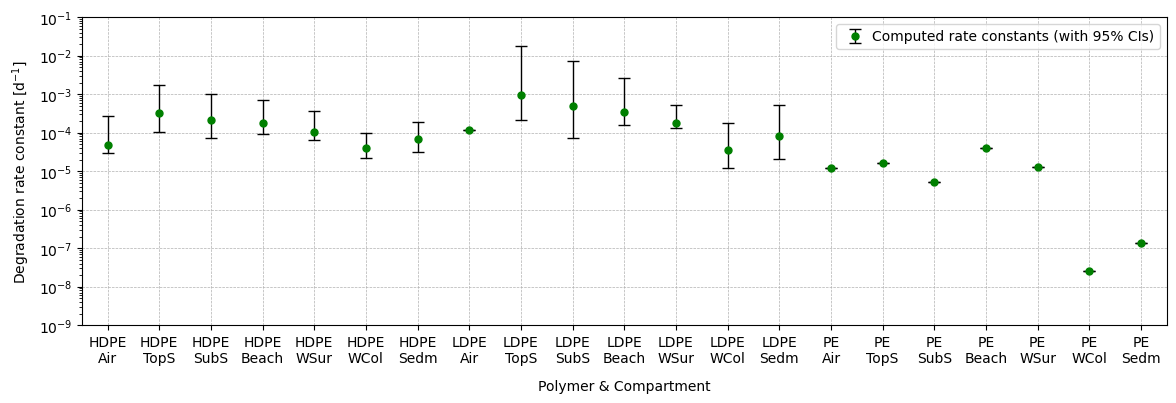

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(14, 4))

data_D_2 = data_D_2.copy()
x = range(len(data_D_2))
data_D_2['x_labels'] = data_D_2['Polymer.1'] + '\n' + data_D_2['Compartment.1']

y = data_D_2['kdegr [d-1]']
yerr_lower = y - data_D_2['kdegr_LL[d-1]']
yerr_upper = data_D_2['kdegr_UL[d-1]'] - y
yerr = [yerr_lower, yerr_upper]  # Asymmetric error bars

# Plot main results with asymmetric error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', color='green', ecolor='black', markersize=5,
             elinewidth=1, capsize=4, label='Computed rate constants (with 95% CIs)')

# Show the outliers (outside the plot boundary)
y_max = 1e-1
label_y = y_max * 10**0.25  # X% above the plot top

for i in range(len(data_D_2)):
    upper = data_D_2['kdegr_UL[d-1]'].iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}".replace("+", "")

        plt.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False  
        )       

    # Draw text label
        plt.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            # fontsize=9,
            color='grey'
        )

# Configure x-axis
plt.xticks(x, data_D_2['x_labels'])
plt.yscale('log')
plt.xlabel('Polymer & Compartment', labelpad=10)
plt.ylabel('Degradation rate constant [d$^{-1}$]', labelpad=5)
plt.legend(loc='upper right', handletextpad=0.2)
plt.xlim(-0.5, len(data_D_2) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-9, 1e-1)  # Set the y-axis range (change manually)
plt.grid(True, which="major", ls="--", lw=0.5)

plt.savefig("/Users/elchulito/DEGR_bottom.png", dpi=600, bbox_inches='tight')
plt.show()